<a href="https://colab.research.google.com/github/JoniGellatly/hello-world/blob/main/CM3710%20Assessment%20Joni%20Gellatly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Joni Gellatly** - 2013336


###**CM3710 – Machine Learning and Artificial Intelligence**
###**Coursework Specification Part 2**

**Introduction**

Due to changing my job I no longer have access to the data I intended to use. I have now selected a dataset available to the public from 'Kaggle' which is called 'Stroke Prediction Dataset' and available from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. The dataset has 12 attributes and 5110 rows. The data set can be used to predict a patients chances of a stoke based on various parameters. The attributes for the data set are as follows;

1) id

2) gender

3) age

4) hypertension

5) heart_disease

6) ever_married

7) work_type

8) Residence_type

9) avg_glucose_level

10) bmi

11) smoking_status

12) stroke



**Dataset available from**


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/download?datasetVersionNumber=1

**Load and Pre-processing of dataset**

In [1]:
import pandas as pd #we will use pandas to view data in dataframes
import io #io we use to load the data after uploading (as colab uses dictionaries to store uploaded files)
from google.colab import files #finally, we import the files package from google.colab framework to be able to upload files

uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd #import liabrary
df = pd.read_csv('healthcare-dataset-stroke-data.csv') #read file
df.head() #print top 5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can see the data has some blanks (NaN)  shown above against the bmi.  We will need to inverstigate this further.  Firstly we will check to see how many rows and columns the dataset has and to ensure matches what we expected which is 5110 rows and 12 columns.

In [3]:
df.shape #shows number rows and columns

(5110, 12)

We will now check to see if there are any blanks in the dataset which could cause issues when we carry out algorithms later.

In [4]:
df.isna().sum() #identifies blanks within dataframe

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We have identified 201 blanks against bmi. We can either replace the bmi with an average or remove from the dataframe I have chosen to remove the blanks.

In [5]:
df = df.dropna() #removes blanks
df.shape #shows how many rows and columns left after removing blanks

(4909, 12)

We can see from above that 201 rows of data have succefully been removed.  We can view the dataframe and visually check the data against ID. 1 has been removed.  I will then check to see if there are any duplicate entries.

In [6]:
df.duplicated().sum() #shows duplicates

0

No duplicates showing so no need to remove.  We can now have a look at the data and see how many patients had a stroke (1) or if not(0).  We can see the majority did not have a stroke.  We can now implement some algorithms but firstly we will need to check the data types as they will need to be integers and drop some data we do not want to use.

In [7]:
df #print dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We can see how many patients had a stroke and how many did not.  We can see below 4700 patients did not have a stroke and 209 did.  We can visualise this.

In [8]:
stroke = df[df['stroke'] == 0] ['stroke'].count() #selecting rows where 'stroke' column is 0
no_stroke = df[df['stroke'] == 1] ['stroke'].count() #selecting rows where 'stroke' column is 1
print('no_stroke, stroke') #print text
no_stroke,stroke

no_stroke, stroke


(209, 4700)

We can look at the data and compair details on patient who had or did not have a stroke. The first table shows stroke and non stroke patients, the second one shows stroke patients and the third non stroke patients. We can see from the information that 4.7% of the patients did not have a stroke and that the average age is higher in stroke patients. We can visualise the difference between stroke and non stroke patients.

In [ ]:
df.drop(['id'], axis=1, inplace = True) #dropping id column
df.describe() #print statistical summary

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df[df['stroke'] ==1].describe() #selecting rows where 'stroke' column is 1

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.0
mean,37546.038278,67.712919,0.287081,0.191388,134.571388,30.471292,1.0
std,22078.273383,12.402848,0.453486,0.394338,62.462047,6.329452,0.0
min,210.000000,14.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17308.000000,58.000000,0.000000,0.000000,80.430000,26.400000,1.0
50%,36857.000000,70.000000,0.000000,0.000000,106.580000,29.700000,1.0
75%,56939.000000,78.000000,1.000000,0.000000,196.920000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [10]:
df[df['stroke'] ==0].describe() #selecting rows where 'stroke' column is 0

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.0
mean,37042.892128,41.760451,0.083191,0.043191,104.003736,28.823064,0.0
std,20947.839253,22.268129,0.276201,0.203310,42.997798,7.908287,0.0
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,18631.000000,24.000000,0.000000,0.000000,76.887500,23.400000,0.0
50%,37630.000000,43.000000,0.000000,0.000000,91.210000,28.000000,0.0
75%,54988.000000,59.000000,0.000000,0.000000,112.432500,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


In [11]:
#selecting rows where 'stroke' column is 0
age_stroke = sns.histplot(x = 'stroke', hue ='stroke', data = df, bins = 1, multiple = 'stack')

NameError: ignored

We can look at the patients gender and visualise. There are more females than males.

In [12]:
gender_count = df['gender'].value_counts() #count gender value
gender_count

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

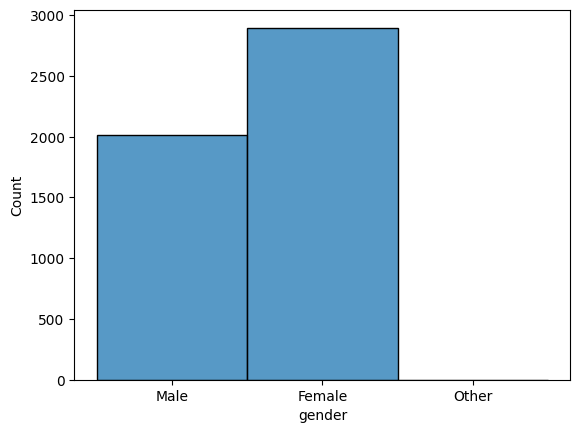

In [13]:
import seaborn as sns #import library
sns.histplot(df['gender']) #shows histogram of values

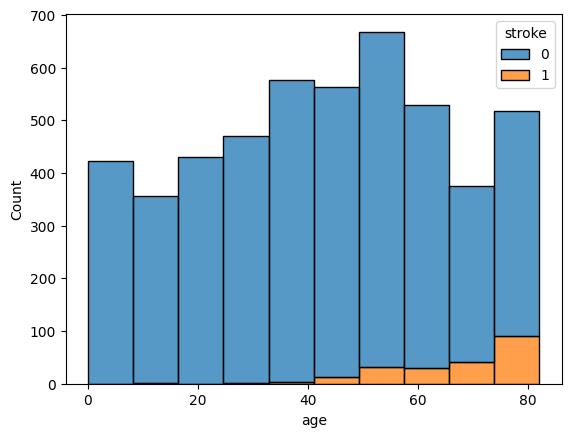

In [14]:
age_stroke = sns.histplot(x = 'age', hue ='stroke', data = df, bins = 10, multiple = 'stack') #shows a stack histogram of values

I have compaired the patients age against there chance of having a stroke.  Using a stacked histogram we can clearly see above patients under 40 years of age have a slim to no chance of a stroke however from 40 onwards is slowly increases.  Once we are near 80 the chances are much higher but still in comparison to not having a stroke are small.  Below I have created a scatter matrix which shows all the attributes against one another. However I am interested in predicting if a patient would have a stoke or not.

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='age', ylabel='id'>,
        <Axes: xlabel='hypertension', ylabel='id'>,
        <Axes: xlabel='heart_disease', ylabel='id'>,
        <Axes: xlabel='avg_glucose_level', ylabel='id'>,
        <Axes: xlabel='bmi', ylabel='id'>,
        <Axes: xlabel='stroke', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hypertension', ylabel='age'>,
        <Axes: xlabel='heart_disease', ylabel='age'>,
        <Axes: xlabel='avg_glucose_level', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='stroke', ylabel='age'>],
       [<Axes: xlabel='id', ylabel='hypertension'>,
        <Axes: xlabel='age', ylabel='hypertension'>,
        <Axes: xlabel='hypertension', ylabel='hypertension'>,
        <Axes: xlabel='heart_disease', ylabel='hypertension'>,
        <Axes: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <Axes: xlabel=

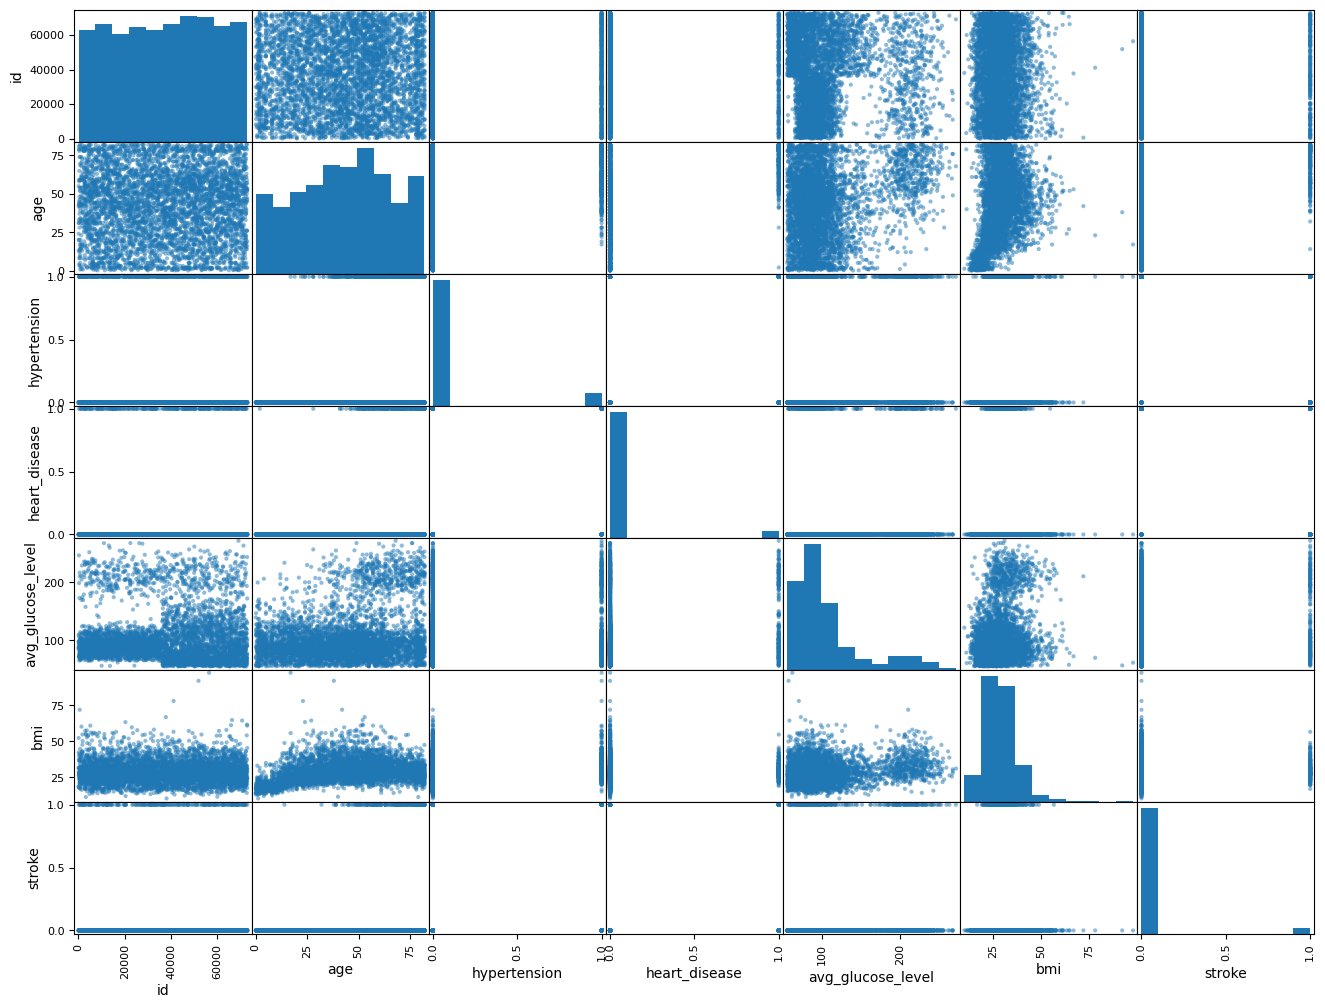

In [15]:
from pandas.plotting import scatter_matrix #scatter matrix
scatter_matrix(df, figsize= (16,12)) # create the scatter matrix plot

In [16]:
df.dtypes #dataframe types

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

When analysing data your would need the attributes you are using to be as int64 (integer) for when you do algorithms. We can do this by replacing the parameter values. Example below.  Above you can see gender is an object, we will now replace to an int64. Then repeated for all others.

In [17]:
df['gender'] = df['gender'].replace({'Female': 1,'Male': 0, 'Other': -1}) #replace objects to integers i.e. Female to 1
df['ever_married'] = df['ever_married'].replace({'Yes': 1,'No': 0}) #replace objects to integers
df['work_type'] = df['work_type'].replace({'Private': 4,'Self-employed': 3,'Never_worked': 2, 'Govt_job' : 1, 'children' : 0}) #replace objects to integers
df['Residence_type'] = df['Residence_type'].replace({'Rural': 1, 'Urban' : 0}) #replace objects to integers
df['smoking_status'] = df['smoking_status'].replace({'Unknown': 3, 'smokes' : 2, 'formerly smoked': 1, 'never smoked' : 0}) #replace objects to integers
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,4,0,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,4,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,4,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,3,1,174.12,24.0,0,1
5,56669,0,81.0,0,0,1,4,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,0,1,103.08,18.6,3,0
5106,44873,1,81.0,0,0,1,3,0,125.20,40.0,0,0
5107,19723,1,35.0,0,0,1,3,1,82.99,30.6,0,0
5108,37544,0,51.0,0,0,1,4,1,166.29,25.6,1,0


You can see above gender etc has now changed to an integer.

In [18]:
df.dtypes #dataframe types

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# Implementing (k-Nearest Neighbour) kNN in sci-kit learn and evaluation

As previously mentioned the data type needs to be integers (numerical) values.  We could use any of the integer values when creating a model using the KNN algorithm.  I will use the stoke values and create a train and test data set split 75% / 25%.  The train dataset will be used to fit the machine learning model and then the test dataset will be used to evaluate the fit of the model. We can see how the model performs on new data.

In [19]:
x = df.drop(columns=['stroke']) #x is all other columns except stroke
y = df['stroke'] #y is only stroke column
x,y #print x,y

(         id  gender   age  hypertension  heart_disease  ever_married  \
 0      9046       0  67.0             0              1             1   
 2     31112       0  80.0             0              1             1   
 3     60182       1  49.0             0              0             1   
 4      1665       1  79.0             1              0             1   
 5     56669       0  81.0             0              0             1   
 ...     ...     ...   ...           ...            ...           ...   
 5104  14180       1  13.0             0              0             0   
 5106  44873       1  81.0             0              0             1   
 5107  19723       1  35.0             0              0             1   
 5108  37544       0  51.0             0              0             1   
 5109  44679       1  44.0             0              0             1   
 
       work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
 0             4               0             2

In [20]:
from sklearn.model_selection import train_test_split #import tools from library
from pandas.core.common import random_state #import tools from library

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.80) #split dataset into 80% train and 20% test


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape #print shape of each split

((3927, 10), (982, 10), (3927,), (982,))

I have split the dataset into a 80% train (x) and 20% test (y) which is the most commontly used ratio. As above we can view the values for each split.

In [34]:
from sklearn.neighbors import KNeighborsClassifier #import tools from library
from sklearn.model_selection import StratifiedKFold #ensures classes have equal representation across folds
from sklearn.metrics import accuracy_score #import accuracy metric for model prediction

acc_score = [] #create a list to store the accuracy values
model = KNeighborsClassifier(n_neighbors = 1, weights = 'distance') #change distance function instantiate the model

model.fit(x_train, y_train) #fit training data
predictions = model.predict(x_test) #predict on test data

acc = accuracy_score(predictions, y_test) #compair prediction label with true label, calculates accuracy of classification model
acc_score.append(acc) #append list

acc_score #print score

[0.929735234215886]

In [35]:
acc_score = [] #create a list to store the accuracy values
model1 = KNeighborsClassifier(n_neighbors = 10, weights = 'distance') #change distance function instantiate the model

model1.fit(x_train, y_train) #fit training data
predictions = model1.predict(x_test) #predict on test data

acc = accuracy_score(predictions, y_test) #accuracy score shows how well the model is performing
acc_score.append(acc) #append list

acc_score #print score

[0.9562118126272913]

Increased the number of neighbours from 1 to 10.

In [36]:
acc_score = [] #create a list to store the accuracy values
model3 = KNeighborsClassifier(n_neighbors=1, metric="manhattan") #change distance function instantiate the model
model3.fit(x_train, y_train) #fit training data
predictions = model3.predict(x_test) #predict on test data

acc = accuracy_score(predictions, y_test) #accuracy score shows how well the model is performing
acc_score.append(acc) #append list

acc_score #print score

[0.9317718940936863]

Change the distance metric to manhattan.

In [37]:
acc_score = [] #create a list to store the accuracy values
model4 = KNeighborsClassifier(n_neighbors=10, metric="manhattan") #change distance function instantiate the model
model4.fit(x_train, y_train) #fit training data
predictions = model4.predict(x_test) #predict on test data

acc = accuracy_score(predictions, y_test) #accuracy score shows how well the model is performing
acc_score.append(acc) #append list

acc_score #print score

[0.9562118126272913]

Increase the number of neighbours to distance weighting.

---



All the accurary score results are over 92% which is a great result. We can conclude the all performing algorithms work similar with the best results having number of neighbours 10 which gives a perentage over 95% accuracy score for patients not to have a stoke.

# Implementation of (Support Vector Machine) SVM Algorithm and evaluation

I will create various models and amend the kernel functions to linear, polynomial, RBF, sigmoid and compair.

In [26]:
from sklearn.svm import SVC  #import tools from library

model5 = SVC(random_state = 0, kernel = 'linear') #specifies the linear kernel which should be used for the SVC, linear
model5.fit(x_train, y_train) #fit training data

pred = model5.predict(x_test) #predict on test data

model5.score(x_train, y_train), model5.score(x_test, y_test) #print train and test score

(0.953144894321365, 0.9521384928716904)

In [27]:
from sklearn.metrics import confusion_matrix #import tools from library

con_matrix = confusion_matrix(y_test, pred) # create confusion matrix based on the predicted labels (pred) and the true labels (y_test)
con_matrix #print confusion matrix

array([[933,   6],
       [ 41,   2]])

We can visualise the confusion matrix. It appears imbalanced due to the dataset. However changing the train and test split does amend the results.

<Axes: >

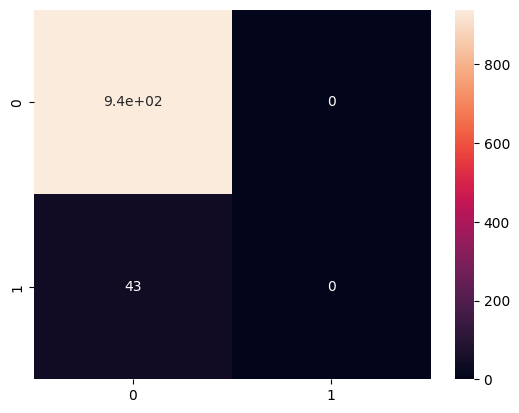

In [ ]:
import seaborn as sns #import library
sns.heatmap(con_matrix, annot=True) #visualise as heatmap

In [28]:
#from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred) #accuracy score shows how well the model is performing
acc #print score

0.9521384928716904

In [29]:
#from sklearn.svm import SVC

model6 = SVC(random_state = 0, kernel = 'poly') #from sklearn.svm import SVC

model8 = SVC(kernel = 'sigmoid') #set SVM classifier (kernel = sigmoid)
model8.fit(x_train, y_train) #fit training data

pred = model8.predict(x_test) #predict on test data

model8.score(x_train, y_train), model8.score(x_test, y_test) #print train and test score
model6.fit(x_train, y_train) #fit training data

pred = model6.predict(x_test) #predict on test data

model6.score(x_train, y_train), model6.score(x_test, y_test) #print train and test score

(0.95772854596384, 0.9562118126272913)

In [30]:
acc = accuracy_score(y_test, pred) #accuracy score shows how well the model is performing
acc #print score

0.9562118126272913

In [31]:
#from sklearn.svm import SVC

model7 = SVC(kernel = 'rbf') #create an SVC object with the 'rbf' kernel
model7.fit(x_train, y_train) #fit training data

pred = model7.predict(x_test) #predict on test data

model7.score(x_train, y_train), model7.score(x_test, y_test) #print train and test score

(0.95772854596384, 0.9562118126272913)

In [32]:
#from sklearn.svm import SVC

model8 = SVC(kernel = 'sigmoid') #create an SVC object with the 'rigmoid' kernel
model8.fit(x_train, y_train) #fit training data

pred = model8.predict(x_test) #predict on test data

model8.score(x_train, y_train), model8.score(x_test, y_test) #print train and test score

(0.9556913674560733, 0.9562118126272913)

In [ ]:
acc = accuracy_score(y_test, pred) #accuracy score shows how well the model is performing
acc #print score

0.9562118126272913

In [33]:
from sklearn.metrics import classification_report #import library

print("Classification Report Metric:") #print (info)
print(classification_report(y_test, pred)) #print classification report

Classification Report Metric:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

kNN is a "neighbors voting" algorithm where the class of a new data point is determined by the majority vote of its nearest neighbors.
SVM is a "boundary finding" algorithm that aims to find the best separator between different classes of data.
The selection between kNN and SVM depends on factors such as dataset size, complexity of decision boundaries, interpretability requirements, and the nature of the problem. I use both algorithms and the out come for both are very similar around 95% patients will not have a stroke.  